In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('AAPL.csv', header=0, usecols=['Date', 'Close'], parse_dates=True, index_col='Date')

In [3]:
print(data)

                 Close
Date                  
2014-10-16   96.260002
2014-10-17   97.669998
2014-10-20   99.760002
2014-10-21  102.470001
2014-10-22  102.989998
2014-10-23  104.830002
2014-10-24  105.220001
2014-10-27  105.110001
2014-10-28  106.739998
2014-10-29  107.339996
2014-10-30  106.980003
2014-10-31  108.000000
2014-11-03  109.400002
2014-11-04  108.599998
2014-11-05  108.860001
2014-11-06  108.699997
2014-11-07  109.010002
2014-11-10  108.830002
2014-11-11  109.699997
2014-11-12  111.250000
2014-11-13  112.820000
2014-11-14  114.180000
2014-11-17  113.989998
2014-11-18  115.470001
2014-11-19  114.669998
2014-11-20  116.309998
2014-11-21  116.470001
2014-11-24  118.629997
2014-11-25  117.599998
2014-11-26  119.000000
...                ...
2019-09-06  213.259995
2019-09-09  214.169998
2019-09-10  216.699997
2019-09-11  223.589996
2019-09-12  223.089996
2019-09-13  218.750000
2019-09-16  219.899994
2019-09-17  220.699997
2019-09-18  222.770004
2019-09-19  220.960007
2019-09-20 

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


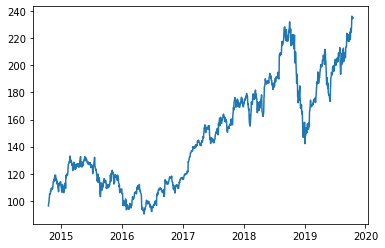

In [4]:
plt.plot(data['Close'])
plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)

[[0.04058412]
 [0.05025023]
 [0.06457809]
 ...
 [0.99389868]
 [0.98738595]
 [0.99362441]]


In [6]:
# Creating data sets

In [7]:
train_length = int(len(scaled_data) * 0.7)
test_length = len(scaled_data) - train_length

train_data = scaled_data[0:train_length,:] # First 70% in the 1st set
test_data = scaled_data[train_length:len(scaled_data),:] # Remaining 30% in the 2nd set

In [8]:
def create_dataset(dataset, timestep=1):
    data_x, data_y = [], []
    
    for i in range(len(dataset) - timestep-1):
        data_x.append(dataset[i:(i+timestep), 0])
        data_y.append(dataset[i+timestep, 0])
        
    return np.array(data_x), np.array(data_y)

In [9]:
timestep = 1

train_x, train_y = create_dataset(train_data, timestep)
test_x, test_y = create_dataset(test_data, timestep)

print(train_x)

[[0.04058412]
 [0.05025023]
 [0.06457809]
 [0.08315626]
 [0.08672106]
 [0.09933506]
 [0.10200866]
 [0.10125457]
 [0.11242888]
 [0.11654212]
 [0.11407422]
 [0.12106672]
 [0.13066432]
 [0.12517996]
 [0.12696239]
 [0.12586549]
 [0.12799071]
 [0.12675673]
 [0.13272091]
 [0.14334683]
 [0.15410984]
 [0.16343321]
 [0.16213067]
 [0.17227671]
 [0.16679235]
 [0.17803524]
 [0.17913212]
 [0.1939398 ]
 [0.18687873]
 [0.19647633]
 [0.19599645]
 [0.16953453]
 [0.16651813]
 [0.17543019]
 [0.17241379]
 [0.16905465]
 [0.15123058]
 [0.1630219 ]
 [0.1481456 ]
 [0.14588336]
 [0.13292662]
 [0.12264349]
 [0.11249745]
 [0.13073289]
 [0.15294443]
 [0.1469802 ]
 [0.1549325 ]
 [0.15219033]
 [0.14855696]
 [0.16213067]
 [0.16158227]
 [0.15205319]
 [0.1373826 ]
 [0.13018444]
 [0.10906974]
 [0.10913831]
 [0.11935287]
 [0.14773429]
 [0.14855696]
 [0.12963599]
 [0.13628576]
 [0.1334065 ]
 [0.11297733]
 [0.10728732]
 [0.12600263]
 [0.13169264]
 [0.15123058]
 [0.15520673]
 [0.15602934]
 [0.12888189]
 [0.17117982]
 [0.19

In [10]:
print(train_x.shape)

(880, 1)


In [11]:
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

print(train_x)

[[[0.04058412]]

 [[0.05025023]]

 [[0.06457809]]

 [[0.08315626]]

 [[0.08672106]]

 [[0.09933506]]

 [[0.10200866]]

 [[0.10125457]]

 [[0.11242888]]

 [[0.11654212]]

 [[0.11407422]]

 [[0.12106672]]

 [[0.13066432]]

 [[0.12517996]]

 [[0.12696239]]

 [[0.12586549]]

 [[0.12799071]]

 [[0.12675673]]

 [[0.13272091]]

 [[0.14334683]]

 [[0.15410984]]

 [[0.16343321]]

 [[0.16213067]]

 [[0.17227671]]

 [[0.16679235]]

 [[0.17803524]]

 [[0.17913212]]

 [[0.1939398 ]]

 [[0.18687873]]

 [[0.19647633]]

 [[0.19599645]]

 [[0.16953453]]

 [[0.16651813]]

 [[0.17543019]]

 [[0.17241379]]

 [[0.16905465]]

 [[0.15123058]]

 [[0.1630219 ]]

 [[0.1481456 ]]

 [[0.14588336]]

 [[0.13292662]]

 [[0.12264349]]

 [[0.11249745]]

 [[0.13073289]]

 [[0.15294443]]

 [[0.1469802 ]]

 [[0.1549325 ]]

 [[0.15219033]]

 [[0.14855696]]

 [[0.16213067]]

 [[0.16158227]]

 [[0.15205319]]

 [[0.1373826 ]]

 [[0.13018444]]

 [[0.10906974]]

 [[0.10913831]]

 [[0.11935287]]

 [[0.14773429]]

 [[0.14855696]

In [12]:
# Building the model

In [13]:
from tensorflow.keras import backend

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [14]:
model = Sequential()
model.add(LSTM(256, input_shape=(1,1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', ooptimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               264192    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
# Training and testing the model 

In [16]:
model.fit(train_x, train_y, epochs=1, batch_size=1, verbose=1)
score = model.evaluate(train_x, train_y, verbose=0)

print('Keras model loss = ', score[0])
print('Keras model acuracy = ', score[1])

Train on 880 samples
880/880 [==============================] - 5s 5ms/sample - loss: 0.0186 - accuracy: 0.0011
Keras model loss =  0.000713703414128924
Keras model acuracy =  0.0011363636


In [17]:
# Understanding model output

In [18]:
train_predictions = model.predict(train_x)
test_predictions = model.predict(test_x)

print(train_predictions)

[[0.08980444]
 [0.09393978]
 [0.10038   ]
 [0.10930517]
 [0.11109456]
 [0.11763012]
 [0.11905721]
 [0.11865327]
 [0.12475973]
 [0.1270735 ]
 [0.12568095]
 [0.12966034]
 [0.13529408]
 [0.1320504 ]
 [0.13309747]
 [0.13245219]
 [0.13370451]
 [0.1329763 ]
 [0.13652742]
 [0.14304882]
 [0.14991266]
 [0.15607205]
 [0.15519941]
 [0.16210023]
 [0.15834033]
 [0.16612372]
 [0.16689903]
 [0.17764395]
 [0.17245516]
 [0.17953688]
 [0.17917758]
 [0.16021138]
 [0.15815416]
 [0.16429394]
 [0.16219497]
 [0.15988275]
 [0.14805084]
 [0.15579596]
 [0.14607674]
 [0.14464283]
 [0.13665122]
 [0.13057232]
 [0.12479803]
 [0.13533506]
 [0.14915672]
 [0.14533663]
 [0.15044805]
 [0.14866927]
 [0.14633864]
 [0.15519941]
 [0.15483323]
 [0.14858079]
 [0.1393575 ]
 [0.13500762]
 [0.12289661]
 [0.12293449]
 [0.12867546]
 [0.14581516]
 [0.14633864]
 [0.13468081]
 [0.13868734]
 [0.13694066]
 [0.12506622]
 [0.12191769]
 [0.1325328 ]
 [0.13590956]
 [0.14805084]
 [0.15062699]
 [0.1511645 ]
 [0.13423267]
 [0.16134253]
 [0.17

In [19]:
# Scale up

train_predictions = scaler.inverse_transform(train_predictions)
train_y = scaler.inverse_transform([train_y])

test_predictions = scaler.inverse_transform(test_predictions)
test_y = scaler.inverse_transform([test_y])

print(train_predictions)

[[103.43977 ]
 [104.04299 ]
 [104.98243 ]
 [106.28435 ]
 [106.545364]
 [107.4987  ]
 [107.70688 ]
 [107.64795 ]
 [108.5387  ]
 [108.87621 ]
 [108.67308 ]
 [109.253555]
 [110.07534 ]
 [109.60219 ]
 [109.75492 ]
 [109.6608  ]
 [109.843475]
 [109.73725 ]
 [110.25525 ]
 [111.20653 ]
 [112.207756]
 [113.10623 ]
 [112.978935]
 [113.98556 ]
 [113.4371  ]
 [114.572464]
 [114.685555]
 [116.25292 ]
 [115.49603 ]
 [116.52904 ]
 [116.47663 ]
 [113.71003 ]
 [113.40995 ]
 [114.30556 ]
 [113.999374]
 [113.662094]
 [111.93617 ]
 [113.065956]
 [111.64821 ]
 [111.43905 ]
 [110.27331 ]
 [109.38658 ]
 [108.54429 ]
 [110.08132 ]
 [112.09749 ]
 [111.54025 ]
 [112.28586 ]
 [112.02639 ]
 [111.68642 ]
 [112.978935]
 [112.92552 ]
 [112.01347 ]
 [110.668076]
 [110.033554]
 [108.26692 ]
 [108.27245 ]
 [109.109886]
 [111.61006 ]
 [111.68642 ]
 [109.985886]
 [110.57032 ]
 [110.31553 ]
 [108.583405]
 [108.12414 ]
 [109.67256 ]
 [110.16512 ]
 [111.93617 ]
 [112.31196 ]
 [112.390366]
 [109.92052 ]
 [113.87504 ]
 [116.

In [20]:
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:,:] = np.nan
train_predict_plot[1:len(train_predictions)+1, :] = train_predictions

In [21]:
test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predictions)+2+1:len(scaled_data)-1, :] = test_predictions

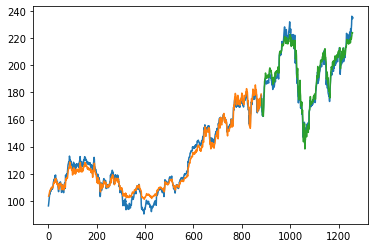

In [22]:
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()